In [1]:
'''
【课程1.2】  分布分析

分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量

极差 / 频率分布情况 / 分组组距及组数

'''

'\n【课程1.2】  分布分析\n\n分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量\n\n极差 / 频率分布情况 / 分组组距及组数\n\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

房屋编码      int64
小区       object
朝向       object
房屋单价      int64
参考首付    float64
参考总价    float64
经度      float64
纬度      float64
dtype: object
--------
数据长度为 75 条


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


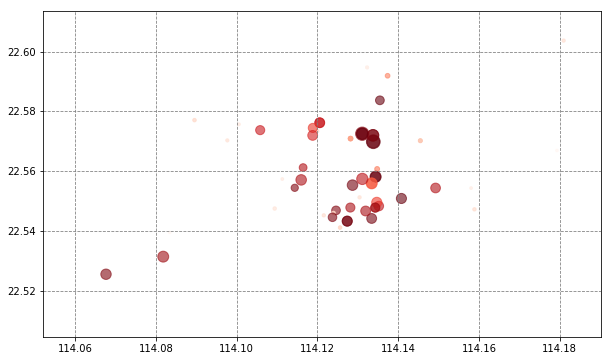

In [8]:
# 读取数据
import os
os.chdir('F:/00.数据分析/【非常重要】课程资料/CLASSDATA_ch04进阶算法学习：统计分析能力强化/CH01数据特征分析')

data = pd.read_csv('深圳罗湖二手房信息.csv',engine='python')
print(data.dtypes)
fig = plt.figure(num=1,figsize=(10,6))
plt.scatter(data['经度'],data['纬度'], #按照经纬度显示坐标
           s = data['房屋单价']/500, # 按照单价显示，以形状的大小为区分
           c = data['参考总价'], # 按照总价显示，以颜色的深浅为区分
           cmap='Reds',
           alpha=0.6)
plt.grid(linestyle='--',color='gray')
print('--------\n数据长度为 %i 条' % len(data))
data.head()
#plt.show()
# 通过数据可见，8个描述字段
# 定量字段： 房屋单价，参考首付，参考总价，*经度，*维度， *房屋编码
# 定性字段： 小区，朝向

In [10]:
# 极差： max - min
# 只针对定量字段

# 创建函数求极差
def d_range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return krange

key1 = '参考总价'
key2 = '参考首付'

dr = d_range(data,key1,key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))
# 求出对应定量字段的极差

参考总价极差为 175.000000 
参考首付极差为 52.500000


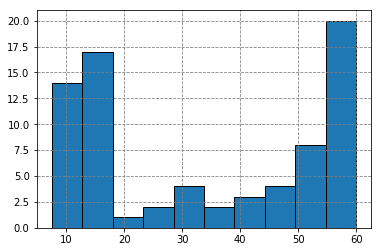

In [13]:
# 频率分布情况 - 定量字段
# ① 通过直方图直接判断分组组数

data[key2].hist(bins=10,
                edgecolor='k'
               )
plt.grid(linestyle='--',color='gray')
# 简单查看数据分布，确定分布组数(bins参数)，一般8-16即可
# 此处以10组为参考

In [41]:
# 频率分布情况，--定量字段
# ② 求出分组区间

gcut = pd.cut(data[key1],10,right=False)
print(type(gcut))
gcut_count = gcut.value_counts(sort=False)
data['%s分组区间' % key1] = gcut.values
print(gcut.head(),'\n---------------------')
print(gcut_count,type(gcut_count))
data.head()
# pd.cut(x,bins,right): 按照组数对x分组，且返回一个和x同样长度的分组dataFrame, right: 是否右边包含，默认True
# 通过groupby 查看不同组的数据频率分布
# 给源数据data添加“分组区间”列

<class 'pandas.core.series.Series'>
0      [42.5, 60.0)
1      [25.0, 42.5)
2      [42.5, 60.0)
3      [25.0, 42.5)
4    [165.0, 182.5)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)] 
---------------------
[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64 <class 'pandas.core.series.Series'>


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考首付分组区间,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)","[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)","[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)","[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)","[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)","[165.0, 182.5)"


In [42]:
# 频率分布情况 -- 定量字段
# ③ 求出目标字段下频率分布的其他统计量， 频数，频率，累计频率
import matplotlib.style
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:'频数'},inplace=True)
r_zj['频率'] = r_zj['频数']/r_zj['频数'].sum()
r_zj['累计频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100))
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f%%" %(x*100))
r_zj.style.bar(subset=['频率','累计频率'],width=100)
#r_zj.head()

,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


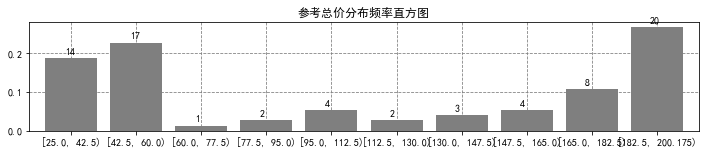

In [54]:
# 频率分布情况-- 定性字段
# ④ 绘制频率直方图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
r_zj['频率'].plot(kind='bar',
               width=0.8,
               figsize=(12,2),
               rot=0,
               color='k',
               grid=True,
               alpha=0.5)
plt.grid(linestyle='--',color='gray')
plt.title('参考总价分布频率直方图')

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']

for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k')
# 添加频数标签


In [66]:
# 频数分布情况 - 定性字段
# ① 通过计算统计，判断不同类别的频率

cx_g = data['朝向'].value_counts(sort=True)
print(cx_g,type(cx_g))
r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns={cx_g.name:'频数'}, inplace=True)
r_cx['频率'] = r_cx['频数']/ r_cx['频数'].sum()
r_cx['累计频率'] = r_cx['频率'].cumsum()
r_cx['频率%'] = r_cx['频率'].apply(lambda x: "%.2f%%" % (x*100))
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x: "%.2f%%" % (x*100))
#print(r_cx.head())
r_cx.style.bar(subset=['频率','累计频率'])

南北    29
南     20
东      8
东南     5
西南     4
北      4
西北     3
东西     1
东北     1
Name: 朝向, dtype: int64 <class 'pandas.core.series.Series'>


,频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.76,10.67%,76.00%
东南,5,0.0666667,0.826667,6.67%,82.67%
西南,4,0.0533333,0.88,5.33%,88.00%
北,4,0.0533333,0.933333,5.33%,93.33%
西北,3,0.04,0.973333,4.00%,97.33%
东西,1,0.0133333,0.986667,1.33%,98.67%
东北,1,0.0133333,1,1.33%,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

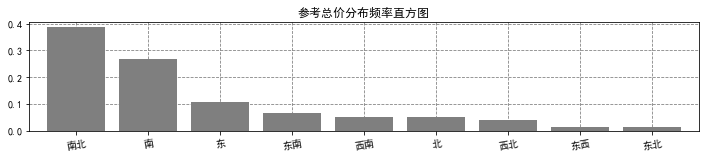

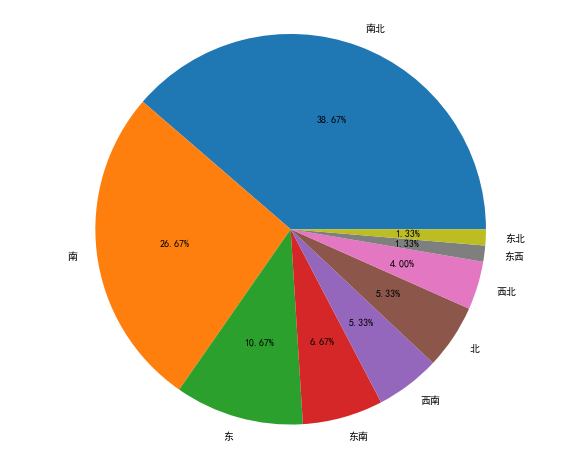

In [73]:
# 频率分布情况 - 定量字段
# ②绘制频率直方图、饼图

plt.figure(num=1,figsize=(12,2))
r_cx['频率'].plot(kind='bar',
               width=0.8,
               rot=10,
               color='k',
               alpha=0.5)
plt.grid(linestyle='--',color='gray')
plt.title('参考总价分布频率直方图')

plt.figure(num=2,figsize=(10,8))
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%')
       #shadow=True)
plt.axis('equal')